In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Trainingsdaten Shape:", x_train.shape)
print("Testdaten Shape:", x_test.shape)
print("Shape eines Bildes:", x_train[0].shape)
print("Label-Beispiel:", y_train[0])

Trainingsdaten Shape: (60000, 28, 28)
Testdaten Shape: (10000, 28, 28)
Shape eines Bildes: (28, 28)
Label-Beispiel: 5


In [3]:
df = pd.DataFrame(x_train.reshape(x_train.shape[0], -1))
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


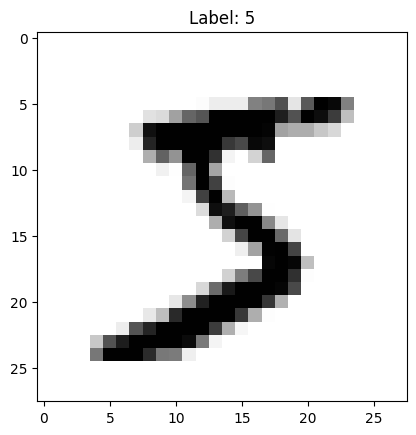

In [4]:
plt.imshow(x_train[0], cmap="gray_r")
plt.title(f"Label: {y_train[0]}")
plt.show()

In [5]:
model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
x_train_norm = x_train.astype("float32") / 255.0
x_test_norm  = x_test.astype("float32") / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

history = model.fit(x_train_norm, y_train_cat,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 788us/step - accuracy: 0.8910 - loss: 0.4085 - val_accuracy: 0.9458 - val_loss: 0.2018
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.9408 - loss: 0.2105 - val_accuracy: 0.9612 - val_loss: 0.1479
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.9539 - loss: 0.1598 - val_accuracy: 0.9677 - val_loss: 0.1212
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9631 - loss: 0.1293 - val_accuracy: 0.9713 - val_loss: 0.1096
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9686 - loss: 0.1094 - val_accuracy: 0.9740 - val_loss: 0.0999


In [7]:
test_loss, test_acc = model.evaluate(x_test_norm, y_test_cat)
print("Test Accuracy:", test_acc)

# Vorhersage-Beispiel
y_pred = model.predict(x_test_norm)
print("Vorhersage für erstes Testbild:", y_pred[0])
print("Tatsächliches Label:", y_test[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - accuracy: 0.9673 - loss: 0.1132
Test Accuracy: 0.9672999978065491
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step
Vorhersage für erstes Testbild: [2.7230917e-07 3.7743536e-08 1.7782887e-04 2.9990256e-03 1.5285140e-09
 1.5215420e-05 2.2053989e-11 9.9667287e-01 1.6418202e-05 1.1821726e-04]
Tatsächliches Label: 7
